In [28]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
# K Nearest Neighbors Classification
class K_Nearest_Neighbors_Classifier() :

	def __init__( self, K ) :

		self.K = K

	# Function to store training set

	def fit( self, X_train, Y_train ) :

		self.X_train = X_train

		self.Y_train = Y_train

		# no_of_training_examples, no_of_features

		self.m, self.n = X_train.shape

	# Function for prediction

	def predict( self, X_test ) :

		self.X_test = X_test

		# no_of_test_examples, no_of_features

		self.m_test, self.n = X_test.shape

		# initialize Y_predict

		Y_predict = np.zeros( self.m_test )

		for i in range( self.m_test ) :

			x = self.X_test[i]

			# find the K nearest neighbors from current test example

			neighbors = np.zeros( self.K )

			neighbors = self.find_neighbors( x )

			# most frequent class in K neighbors

			Y_predict[i] = mode( neighbors )[0][0]

		return Y_predict

	# Function to find the K nearest neighbors to current test example

	def find_neighbors( self, x ) :

		# calculate all the euclidean distances between current
		# test example x and training set X_train

		euclidean_distances = np.zeros( self.m )

		for i in range( self.m ) :

			d = self.euclidean( x, self.X_train[i] )

			euclidean_distances[i] = d

		# sort Y_train according to euclidean_distance_array and
		# store into Y_train_sorted

		inds = euclidean_distances.argsort()

		Y_train_sorted = self.Y_train[inds]

		return Y_train_sorted[:self.K]

	# Function to calculate euclidean distance

	def euclidean( self, x, x_train ) :

		return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Driver code

def main() :

	# Importing dataset

	df = pd.read_csv("/content/diabetes.csv")

	X = df.iloc[:,:-1].values

	Y = df.iloc[:,-1:].values

	# Splitting dataset into train and test set

	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/5, random_state = 10 )

	# Model training

	model = K_Nearest_Neighbors_Classifier( K = 10 )
	model.fit( X_train, Y_train )
	model1 = KNeighborsClassifier( n_neighbors = 10 )
	model1.fit( X_train, Y_train )
	# Prediction on test set
	Y_pred = model.predict( X_test )
	Y_pred1 = model1.predict( X_test )
	# measure performance
	correctly_classified = 0
	correctly_classified1 = 0
	# counter
	count = 0
	for count in range( np.size( Y_pred ) ) :

		if Y_test[count] == Y_pred[count] :

			correctly_classified = correctly_classified + 1

		if Y_test[count] == Y_pred1[count] :

			correctly_classified1 = correctly_classified1 + 1

		count = count + 1

	print( "Accuracy on test set by our model	 : ", (
	correctly_classified / count ) * 100 )
	print( "Accuracy on test set by sklearn model : ", (
	correctly_classified1 / count ) * 100 )

if __name__ == "__main__" :
  main()

Accuracy on test set by our model	 :  77.27272727272727
Accuracy on test set by sklearn model :  77.27272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Third Example**

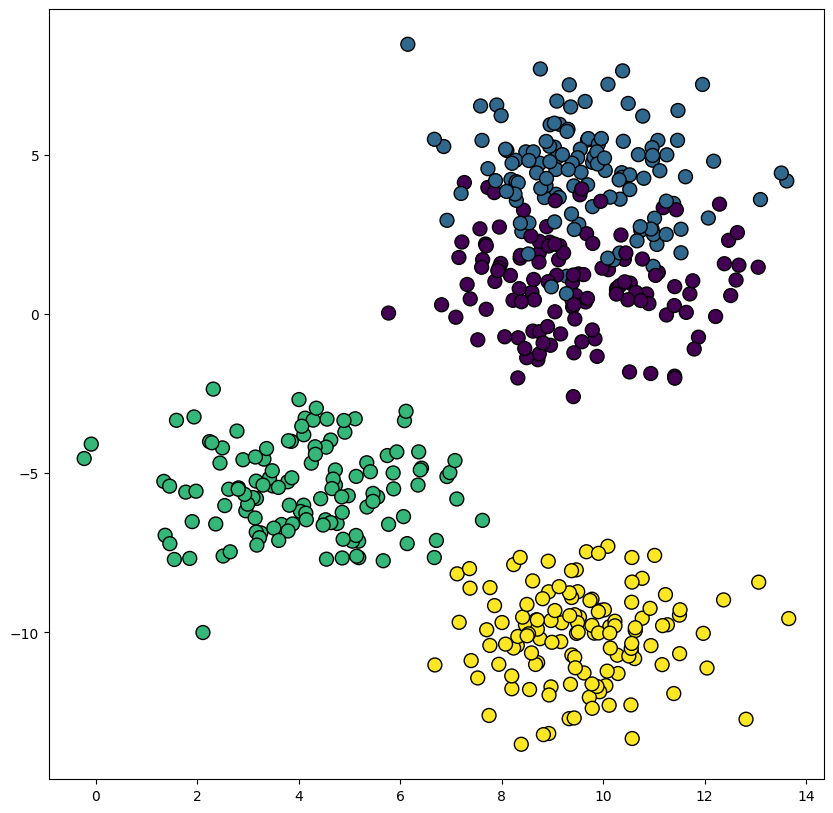

Accuracy with k=5 93.60000000000001
Accuracy with k=1 90.4


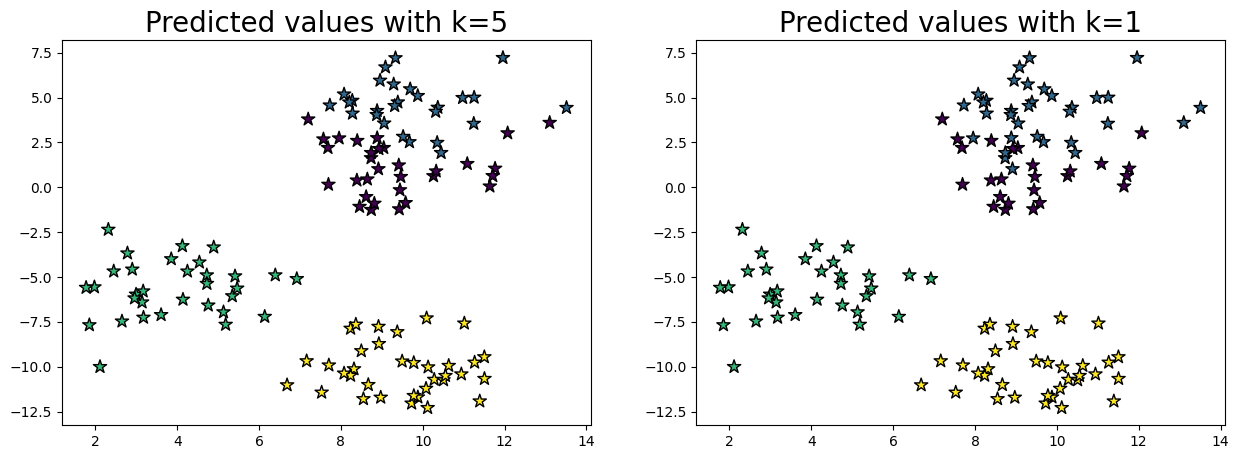

In [29]:
# Module Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Dataset creation, centers = classes, n_features = characteristics
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)
# Dataset visualization
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y,  s=100,edgecolors='black')
plt.show()
# Splitting data into training and testing set, 75% for the train set and 25% for the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# KNN implementation, Two varients
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)
# Predictions for KNN Classifiers (n=5,1)
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
# Accuracy prediction
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
# Predictions visualizaion
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

In [38]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# K Nearest Neighbors Classification
class K_Nearest_Neighbors_Classifier():
    def __init__(self, K):
        self.K = K

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.m, self.n = X_train.shape

    def predict(self, X_test):
        self.X_test = X_test
        self.m_test, self.n = X_test.shape
        Y_predict = np.zeros(self.m_test)

        for i in range(self.m_test):
            x = self.X_test[i]
            neighbors = np.zeros(self.K, dtype=int)
            neighbors[:] = self.find_neighbors(x)  # Assign neighbors array correctly
            Y_predict[i] = mode(neighbors)[0]

        return Y_predict

    def find_neighbors(self, x):
        euclidean_distances = np.zeros(self.m)

        for i in range(self.m):
            d = self.euclidean(x, self.X_train[i])
            euclidean_distances[i] = d

        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]

        return Y_train_sorted[:self.K]

    def euclidean(self, x, x_train):
        return np.sqrt(np.sum(np.square(x - x_train)))

def main():
    # Load Iris dataset
    iris = load_iris()
    X = iris.data
    Y = iris.target

    # Split dataset into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    # List of different K values
    k_values = [3, 5, 7]  # Add more values as needed

    print("Dataset: Iris")

    for K in k_values:
        print("\nK =", K)

        # Custom KNN model
        model = K_Nearest_Neighbors_Classifier(K=K)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy_custom = np.mean(Y_pred == Y_test) * 100
        print("Accuracy (Custom KNN): {:.2f}%".format(accuracy_custom))

        # Scikit-learn KNN model
        model1 = KNeighborsClassifier(n_neighbors=K)
        model1.fit(X_train, Y_train)
        Y_pred1 = model1.predict(X_test)
        accuracy_sklearn = np.mean(Y_pred1 == Y_test) * 100
        print("Accuracy (Scikit-learn KNN): {:.2f}%".format(accuracy_sklearn))

if __name__ == "__main__":
    main()


Dataset: Iris

K = 3
Accuracy (Custom KNN): 97.78%
Accuracy (Scikit-learn KNN): 97.78%

K = 5
Accuracy (Custom KNN): 97.78%
Accuracy (Scikit-learn KNN): 97.78%

K = 7
Accuracy (Custom KNN): 97.78%
Accuracy (Scikit-learn KNN): 97.78%
